In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_excel('Practical-example.Descriptive-statistics-exercise-solution.xlsx')
data

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,Unnamed: 9,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005.0,11.0,Apartment,30,743.0856,246172.6760,Sold,NaN,...,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,1029,1,2005.0,10.0,Apartment,29,756.2128,246331.9040,Sold,NaN,...,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,2002,2,2007.0,7.0,Apartment,2,587.2808,209280.9104,Sold,NaN,...,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,2031,2,2007.0,12.0,Apartment,31,1604.7464,452667.0064,Sold,NaN,...,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,1049,1,2004.0,11.0,Apartment,49,1375.4508,467083.3132,Sold,NaN,...,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaN,NaN,Apartment,44,1238.5836,322610.7392,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaN,NaN,Apartment,47,794.5184,279191.2560,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaN,NaN,Apartment,48,1013.2692,287996.5296,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaN,NaN,Apartment,50,1074.7088,365868.7776,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task # 01

Variable	Type of data	Level of measurement	Comment
1. Cust ID	Categorical	Nominal	This variable has the same properties as ID.
2. Mortgage	Categorical	Nominal	This is a Binary variable. Like a Yes/No question or Gender.
3. Year of sale	Numerical, discrete	Interval	Year is a numerical variable. It is always discrete. The level of measurement is questionable, but we would treat it as interval, as the 0 year would be the time when the Big Bang happened. The current BC-AD calendar was arbitrary chosen (similarly to degrees Celsius and Fahrenheit).


# Task # 02
 Create a frequency distribution graph (that is a histogram with the highest possible number of bins - 272). Use data on all apartments, no matter if sold or not.

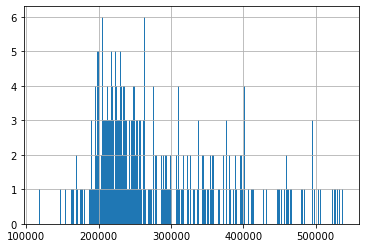

In [3]:
data['Price'].hist(bins = 272)

# Task # 03
 Create a histogram which represents the Price variable. Choose interval width (bins) of length $100,000. If you don't know how to do that, refer to the Course notes on descriptive statistics provided with the first lecture in this section.
 Use the data on all apartments, no matter if sold or not.

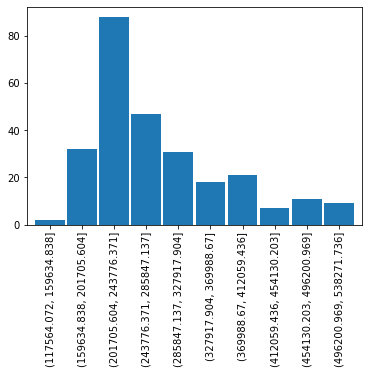

In [4]:
hist,bin_edges = np.histogram(data['Price'])
catagori = pd.cut(data['Price'],bin_edges)
pd.value_counts(catagori).sort_index().plot.bar(width=0.9235)

# Task # 04
The histograms point to similar insights - most of the apartment prices are concentrated in the interval ($217,564.07 to 317,564.07)

# Task # 05
 Create a scatter plot showing the relationship between Price and Area. Use the data on all apartments, no matter if sold or not. Interpret the results.

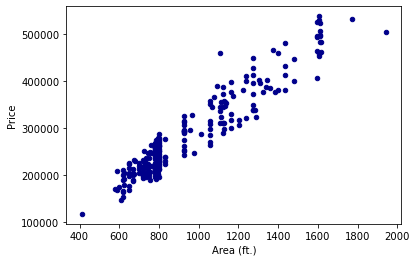

In [5]:
data.plot.scatter(x='Area (ft.)',y='Price',c= 'DarkBlue')

# Task # 06

In [6]:
Freq = data['Country'].value_counts()
rel_freq = ((round(Freq/sum(Freq),2))*100).astype(int)
frame_task6 = pd.DataFrame({'Frequency':Freq,'Relative frequency':rel_freq.astype(str) + "%",'Cummulative Frequency':rel_freq.cumsum().astype(str) + "%"})
frame_task6

,Frequency,Relative frequency,Cummulative Frequency
USA,177,91%,91%
Canada,7,4%,95%
Russia,4,2%,97%
Belgium,2,1%,98%
UK,2,1%,99%
Mexico,1,1%,100%
Germany,1,1%,101%
Denmark,1,1%,102%


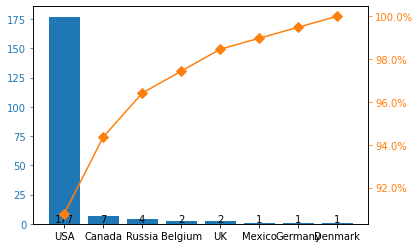

In [7]:
# Pareto Diagram
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
df_sorted = frame_task6.sort_values(by='Frequency',ascending=False)
frame_task6["cumpercentage"] = frame_task6["Frequency"].cumsum()/frame_task6["Frequency"].sum()*100
fig, ax = plt.subplots()
ax.bar(df_sorted.index, df_sorted["Frequency"], color="C0")
for p in ax.patches:                 
    ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., 0),ha='center',va='center',xytext=(0, 5), textcoords='offset points')
ax2 = ax.twinx()
ax2.plot(frame_task6.index, frame_task6["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()